# Example 1

### A very simple two dimensional example with function which depends on value of the second principal component (so PCA returns the first component, EDR-GP - the second one)

In [1]:
cd ..

/home/mikhail/neuro/edr-gp


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

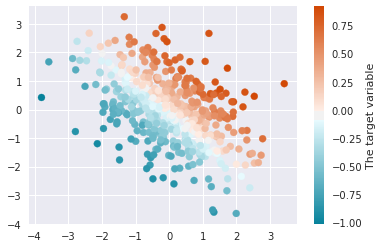

In [24]:
def func(X):
    return np.tanh((X[:, 0] + X[:, 1]) * 0.5)

def get_data(sample_size=500, noise_std=0.05):
    # generate covariance mat
    U = np.array([[1, 1], [-1, 1]])
    S = np.diag([1, 0.3])
    cov = np.dot(np.dot(U, S), U.T)
    # generate centered inputs
    X = np.random.multivariate_normal([0, 0], cov, 500)
    X -= X.mean(0)
    y = func(X) + noise_std * np.random.randn(sample_size)
    return X, y
    
X, y = get_data()

cmap = sns.diverging_palette(220, 20, s=99, as_cmap=True)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.colorbar(label='The target variable')
plt.show()

In [5]:
from sklearn.feature_selection import mutual_info_regression
c = sns.color_palette()
markers = ['o', 's', 'v']
marker_size = 12

def plot_direction(comp):
    x1, x2 = comp[0] * 10
    xlim = plt.xlim()
    ylim = plt.ylim()
    plt.plot([-x1, x1], [-x2, x2], lw=4, label='The selected combination')
    plt.xlim(xlim)
    plt.ylim(ylim)
    
def plot_projections(X, comp):
    labels = ['Original features', 'Features after projection', 'Projection']
    for i, (x, marker) in enumerate(zip(X, markers)):
        x_proj = np.dot(np.dot(x[np.newaxis, :], comp.T), comp)[0]
        plt.plot(*x, marker, c=c[3], label=labels[0], ms=marker_size)
        plt.plot(*x_proj, marker, c=c[2], ms=marker_size, label=labels[1])
        plt.plot([x[0], x_proj[0]], [x[1], x_proj[1]], '--', c=c[2], label=labels[2])
        labels = ['_', '_', '_']

def plot_dr_component(X, y, dr, title):
    comp = dr.components_
    plt.figure(figsize=[12, 5])
    plt.subplot(1, 2, 1)
    plt.plot(*X.T, '.', label='Training sample')
    plt.xlabel('Feature 1', fontsize=16)
    plt.ylabel('Feature 2', fontsize=16)
    plot_direction(comp)
    X_sample = np.array([[-2, 1],[-1.3, 2.3],[2.3, -0.7]])
    plot_projections(X_sample, comp)
    plt.legend(loc='best')
    X_proj = np.dot(X, comp.T)
    plt.subplot(1, 2, 2)
    plt.suptitle(title,b fontsize=18)
    plt.scatter(X_proj, y, c=y, cmap=cmap)
    for i in range(len(X_sample)):
        plt.plot(np.dot(X_sample[i:i+1], comp.T), func(X_sample[i:i+1]),
                 marker=markers[i], ms=marker_size, c=c[3])
    plt.xlabel('The found linear combination ', fontsize=16)
    plt.ylabel('The target variable', fontsize=16)
    plt.show()
    mi = mutual_info_regression(X_proj, y)[0]
    txt = ('Mutual information beween the target and '
           'the found linear combination is {:.3f}'.format(mi))
    print(txt)

In [25]:
from examples/regr

edrgp  examples  MANIFEST.in  README.rst  requirements.txt  setup.py


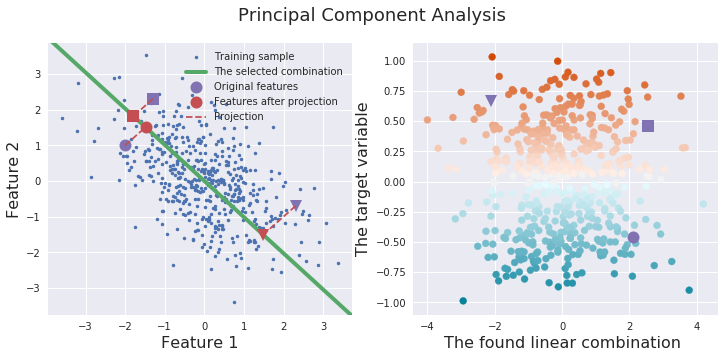

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(X)
plot_dr_component(X, y, pca, 'Principal Component Analysis')

In [7]:
from edrgp.regression import GaussianProcessRegressor
from edrgp.edr import EffectiveDimensionalityReduction

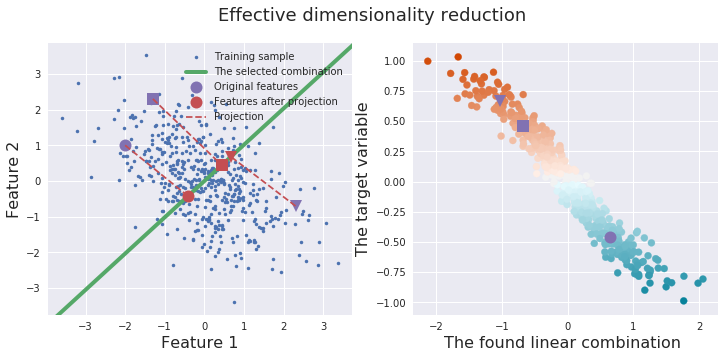

In [9]:
edr = EffectiveDimensionalityReduction(GaussianProcessRegressor(),
                                       PCA(n_components=1), True)
edr.fit(X, y)
plot_dr_component(X, y, edr, 'Effective dimensionality reduction')

In [17]:
pca = PCA(n_components=2)
pca.fit(X)
pca_variance = pca.explained_variance_ratio_

edr = EffectiveDimensionalityReduction(GaussianProcessRegressor(),
                                       PCA(n_components=2), True)
edr.fit(X, y)
edr_variance = edr.dr_transformer.explained_variance_ratio_

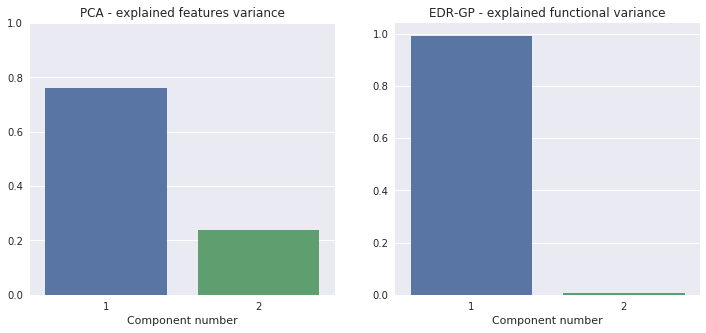

In [22]:
plt.figure(figsize=[12, 5])
plt.subplot(1, 2, 1)
plt.title('PCA - explained features variance')
sns.barplot(x=[1, 2], y=pca_variance)
plt.ylim([0, 1])
plt.xlabel('Component number')

plt.subplot(1, 2, 2)
plt.title('EDR-GP - explained functional variance')
sns.barplot(x=[1, 2], y=edr_variance)
plt.xlabel('Component number')